# PROJECT : Face Mask or Without Mask

**Data Load from Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import Required Libraries**

In [ ]:
import os
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
os.listdir('/content/drive/MyDrive/archive(3)/data')

['with_mask', 'without_mask']

In [ ]:
mask= os.listdir('/content/drive/MyDrive/archive(3)/data/with_mask')
print(mask[:5])
print(mask[-5:])

['with_mask_3374.jpg', 'with_mask_3385.jpg', 'with_mask_3377.jpg', 'with_mask_3433.jpg', 'with_mask_3349.jpg']
['with_mask_150.jpg', 'with_mask_1630.jpg', 'with_mask_1409.jpg', 'with_mask_126.jpg', 'with_mask_1886.jpg']


In [ ]:
no_mask = os.listdir('/content/drive/MyDrive/archive(3)/data/without_mask')
print(no_mask[:5])
print(no_mask[-5:])

['without_mask_3075.jpg', 'without_mask_3351.jpg', 'without_mask_2737.jpg', 'without_mask_496.jpg', 'without_mask_3464.jpg']
['without_mask_1470.jpg', 'without_mask_1933.jpg', 'without_mask_1640.jpg', 'without_mask_2307.jpg', 'without_mask_1205.jpg']


In [ ]:
print(len(mask))
print(len(no_mask))

3725
3828


In [ ]:
mask_label=[1]*3725
no_mask_label=[0]*3828

In [ ]:
print(mask_label[0:5])
print(no_mask_label[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(mask_label))
print(len(no_mask_label))

3725
3828


In [ ]:
labels=mask_label+no_mask_label
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**With mask**

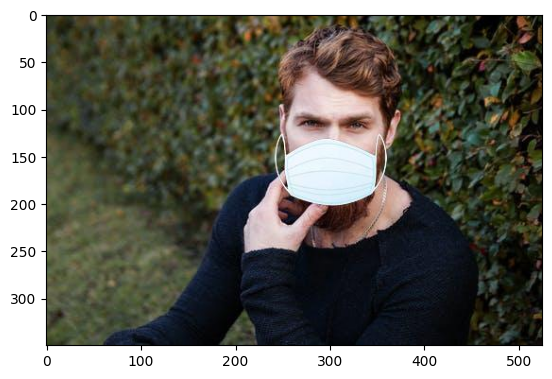

In [ ]:
img1=mpimg.imread('/content/drive/MyDrive/archive(3)/data/with_mask/with_mask_1.jpg')
imgplot1=plt.imshow(img1)
plt.show()

**Without mask**

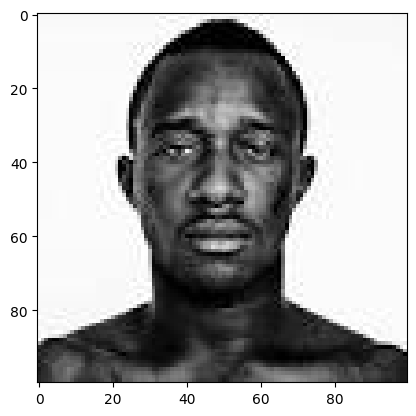

In [ ]:
img2=mpimg.imread('/content/drive/MyDrive/archive(3)/data/without_mask/without_mask_1.jpg')
imgplot2=plt.imshow(img2)
plt.show()

In [ ]:
mask_path = '/content/drive/MyDrive/archive(3)/data/with_mask/'
no_mask_path = '/content/drive/MyDrive/archive(3)/data/without_mask/'
data = []
# Loop through both with_mask and no_mask directories
for directory in [mask_path,no_mask_path]:
    for img_file in os.listdir(directory):
        if img_file.endswith(".png") or img_file.endswith(".jpg"):
            image = Image.open(os.path.join(directory, img_file))
            image = image.resize((128, 128))
            image = image.convert('RGB')
            image = np.array(image)
            data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
len(data)

7553

In [ ]:
data[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  5,   0,   5],
        [  0,   0,   0],
        [154, 153, 154]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [120, 115, 118],
        [ 58,  57,  57],
        [174, 174, 173]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [245, 244, 255],
        [228, 228, 242],
        [245, 245, 248]]

In [ ]:
data[0].shape

(128, 128, 3)

**Separate X and Y**

In [ ]:
x=np.array(data)
y=np.array(labels)

**Data into Training and Testing**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [ ]:
x_train[0]

array([[[43, 41, 42],
        [66, 64, 65],
        [75, 73, 74],
        ...,
        [56, 53, 49],
        [74, 70, 67],
        [76, 72, 69]],

       [[38, 36, 37],
        [51, 49, 50],
        [54, 52, 53],
        ...,
        [67, 64, 61],
        [82, 78, 75],
        [82, 78, 75]],

       [[31, 29, 30],
        [55, 53, 54],
        [62, 60, 61],
        ...,
        [60, 56, 53],
        [76, 72, 69],
        [83, 79, 76]],

       ...,

       [[77, 90, 98],
        [74, 86, 92],
        [73, 83, 89],
        ...,
        [34, 25, 19],
        [32, 25, 19],
        [32, 26, 20]],

       [[67, 84, 91],
        [70, 86, 92],
        [71, 84, 90],
        ...,
        [30, 25, 21],
        [22, 18, 14],
        [18, 15, 10]],

       [[69, 88, 94],
        [73, 92, 96],
        [73, 90, 94],
        ...,
        [28, 25, 20],
        [27, 23, 19],
        [25, 22, 17]]], dtype=uint8)

In [ ]:
x_train_scaled[0]

array([[[0.16862745, 0.16078431, 0.16470588],
        [0.25882353, 0.25098039, 0.25490196],
        [0.29411765, 0.28627451, 0.29019608],
        ...,
        [0.21960784, 0.20784314, 0.19215686],
        [0.29019608, 0.2745098 , 0.2627451 ],
        [0.29803922, 0.28235294, 0.27058824]],

       [[0.14901961, 0.14117647, 0.14509804],
        [0.2       , 0.19215686, 0.19607843],
        [0.21176471, 0.20392157, 0.20784314],
        ...,
        [0.2627451 , 0.25098039, 0.23921569],
        [0.32156863, 0.30588235, 0.29411765],
        [0.32156863, 0.30588235, 0.29411765]],

       [[0.12156863, 0.11372549, 0.11764706],
        [0.21568627, 0.20784314, 0.21176471],
        [0.24313725, 0.23529412, 0.23921569],
        ...,
        [0.23529412, 0.21960784, 0.20784314],
        [0.29803922, 0.28235294, 0.27058824],
        [0.3254902 , 0.30980392, 0.29803922]],

       ...,

       [[0.30196078, 0.35294118, 0.38431373],
        [0.29019608, 0.3372549 , 0.36078431],
        [0.28627451, 0

**Model building functions**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

**Model architecure building**

In [ ]:
no_of_classes=2
#model architecure building
model=Sequential()
#conolutional layer
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
#pooling layers
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
#fully connected layer
model.add(keras.layers.Flatten())
#hidden layer
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))
#output layer
model.add(keras.layers.Dense(no_of_classes,activation='sigmoid'))

**Compile**

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [ ]:
history=model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
149/149 [==============================] - 13s 39ms/step - loss: 0.4995 - acc: 0.7818 - val_loss: 0.3541 - val_acc: 0.8412
Epoch 2/10
149/149 [==============================] - 5s 31ms/step - loss: 0.3134 - acc: 0.8752 - val_loss: 0.2610 - val_acc: 0.9017
Epoch 3/10
149/149 [==============================] - 5s 31ms/step - loss: 0.2703 - acc: 0.8951 - val_loss: 0.2545 - val_acc: 0.8866
Epoch 4/10
149/149 [==============================] - 5s 31ms/step - loss: 0.2177 - acc: 0.9121 - val_loss: 0.2473 - val_acc: 0.9036
Epoch 5/10
149/149 [==============================] - 5s 37ms/step - loss: 0.1850 - acc: 0.9302 - val_loss: 0.2125 - val_acc: 0.9319
Epoch 6/10
149/149 [==============================] - 5s 35ms/step - loss: 0.1681 - acc: 0.9342 - val_loss: 0.2322 - val_acc: 0.9301
Epoch 7/10
149/149 [==============================] - 4s 30ms/step - loss: 0.1336 - acc: 0.9489 - val_loss: 0.2472 - val_acc: 0.9282
Epoch 8/10
149/149 [==============================] - 5s 31ms/step -

**Model loss VS Model accuracy**

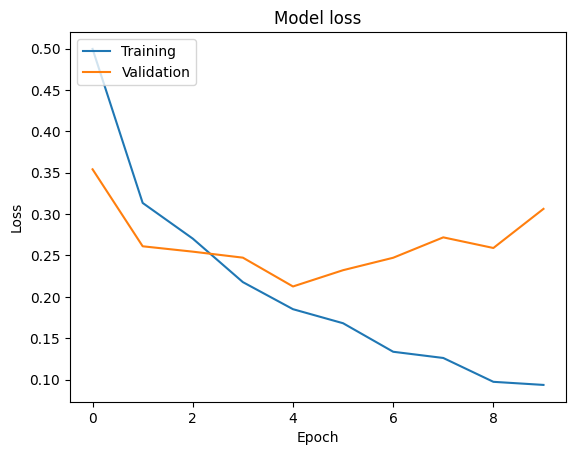

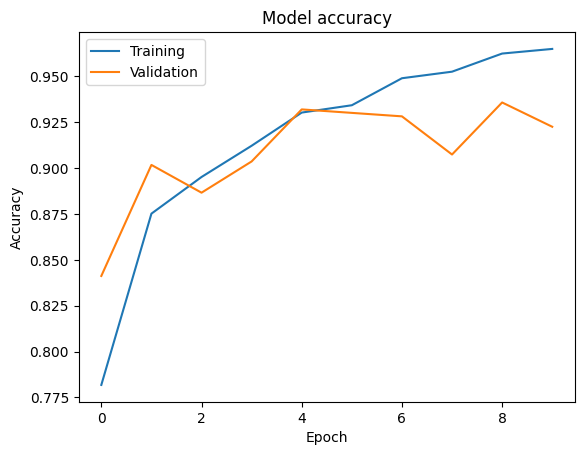

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training','Validation'],loc='upper left')
plt.show()

**Model Predictive System**

Predicted image path :/content/drive/MyDrive/archive(3)/data/with_mask/with_mask_1009.jpg


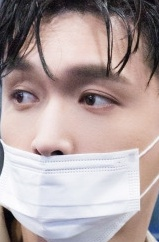

1/1 [==============================] - 0s 470ms/step
[[0.24233913 0.68475795]]
1
Mask is Wearing


In [ ]:
input_image_path=input('Predicted image path :')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized=cv2.resize(input_image,(128,128))
input_image_scaled=input_image_resized/255
input_image_reshaped=np.reshape(input_image_scaled,[1,128,128,3])
input_prediction=model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label=np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label==1:
  print('Mask is Wearing')
else:
  print('Mask is not Wearing')